In [1]:
#Oct_20th_SVM_KNN_Breast_Cancer detection

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
data=pd.read_csv("BreastCancer.csv")

In [5]:
df=data.copy()
df.head()

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0


In [6]:
df["Class"].value_counts()

0    458
1    241
Name: Class, dtype: int64

In [7]:
df["Class"].value_counts(normalize=True)

0    0.655222
1    0.344778
Name: Class, dtype: float64

In [8]:
df["Cl.thickness"].value_counts()

1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: Cl.thickness, dtype: int64

In [9]:
df["Cell.size"].value_counts()

1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: Cell.size, dtype: int64

In [ ]:
# preprocessing -- 
# missing value

In [10]:
df.isnull().sum()

Id                  0
Cl.thickness        0
Cell.size           0
Cell.shape          0
Marg.adhesion       0
Epith.c.size        0
Bare.nuclei        16
Bl.cromatin         0
Normal.nucleoli     0
Mitoses             0
Class               0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               699 non-null    int64  
 1   Cl.thickness     699 non-null    int64  
 2   Cell.size        699 non-null    int64  
 3   Cell.shape       699 non-null    int64  
 4   Marg.adhesion    699 non-null    int64  
 5   Epith.c.size     699 non-null    int64  
 6   Bare.nuclei      683 non-null    float64
 7   Bl.cromatin      699 non-null    int64  
 8   Normal.nucleoli  699 non-null    int64  
 9   Mitoses          699 non-null    int64  
 10  Class            699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [12]:
df.describe()

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,0.344778
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.475636
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [14]:
df1=df.dropna()

In [15]:
df1.shape

(683, 11)

In [16]:
X=df1.drop(["Id","Class"],axis=1)
Y=df1["Class"]

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=101,stratify=Y)

# SVM

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [19]:
from sklearn.svm import SVC,SVR

In [21]:
svc_model=SVC(kernel="poly",degree=8)

In [ ]:
# POLYNOMIAL KERNAL
In algebra the formula for polynomial 
2a*b3(it is the b cube)+4a(-9)-- a to the power -9
# here 3 is the degree of polynomial

In [22]:
svc_model.fit(X_train,Y_train)

SVC(degree=8, kernel='poly')

In [23]:
Y_pred=svc_model.predict(X_test)

In [25]:
accuracy_score(Y_test,Y_pred)

0.9343065693430657

In [26]:
confusion_matrix(Y_test,Y_pred)

array([[85,  4],
       [ 5, 43]], dtype=int64)

In [27]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        89
           1       0.91      0.90      0.91        48

    accuracy                           0.93       137
   macro avg       0.93      0.93      0.93       137
weighted avg       0.93      0.93      0.93       137



In [45]:
svc_model=SVC(kernel="rbf",degree=3,C=1,gamma=0.02)
svc_model.fit(X_train,Y_train)
Y_pred=svc_model.predict(X_test)
print("accuracy score",accuracy_score(Y_test,Y_pred))
print("***********"*2)
print("classification report",classification_report(Y_test,Y_pred))
print("***********"*2)
print(confusion_matrix(Y_test,Y_pred))

accuracy score 0.948905109489051
**********************
classification report               precision    recall  f1-score   support

           0       0.98      0.94      0.96        89
           1       0.90      0.96      0.93        48

    accuracy                           0.95       137
   macro avg       0.94      0.95      0.94       137
weighted avg       0.95      0.95      0.95       137

**********************
[[84  5]
 [ 2 46]]


In [35]:
svc_model=SVC(kernel="sigmoid",degree=3,C=1,gamma=0.01)
svc_model.fit(X_train,Y_train)
Y_pred=svc_model.predict(X_test)
print("accuracy score",accuracy_score(Y_test,Y_pred))
print("***********"*2)
print("classification report",classification_report(Y_test,Y_pred))
print("***********"*2)
print(confusion_matrix(Y_test,Y_pred))

accuracy score 0.40875912408759124
**********************
classification report               precision    recall  f1-score   support

           0       0.54      0.57      0.56        89
           1       0.12      0.10      0.11        48

    accuracy                           0.41       137
   macro avg       0.33      0.34      0.33       137
weighted avg       0.39      0.41      0.40       137

**********************
[[51 38]
 [43  5]]


In [83]:
svc_model=SVC(kernel="linear",degree=3,C=0.5,gamma=0.01,probability=True)
svc_model.fit(X_train,Y_train)
Y_pred=svc_model.predict(X_test)
print("accuracy score",accuracy_score(Y_test,Y_pred))
print("***********"*2)
print("classification report",classification_report(Y_test,Y_pred))
print("***********"*2)
print(confusion_matrix(Y_test,Y_pred))

accuracy score 0.9562043795620438
**********************
classification report               precision    recall  f1-score   support

           0       0.97      0.97      0.97        89
           1       0.94      0.94      0.94        48

    accuracy                           0.96       137
   macro avg       0.95      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137

**********************
[[86  3]
 [ 3 45]]


In [84]:
Y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1], dtype=int64)

In [85]:
Y_test

181    0
322    0
475    0
647    0
266    1
      ..
607    0
209    0
646    0
13     0
39     1
Name: Class, Length: 137, dtype: int64

In [86]:
probability=svc_model.predict_proba(X_test)
probability

array([[9.98588116e-01, 1.41188363e-03],
       [9.92140733e-01, 7.85926653e-03],
       [9.95555253e-01, 4.44474713e-03],
       [9.97783419e-01, 2.21658060e-03],
       [4.40037038e-03, 9.95599630e-01],
       [9.97378947e-01, 2.62105271e-03],
       [9.92115032e-01, 7.88496834e-03],
       [9.79483937e-01, 2.05160632e-02],
       [9.97503025e-01, 2.49697459e-03],
       [1.29432007e-07, 9.99999871e-01],
       [9.96617594e-01, 3.38240629e-03],
       [9.89786869e-01, 1.02131313e-02],
       [9.81419122e-01, 1.85808776e-02],
       [4.09216850e-02, 9.59078315e-01],
       [9.92115032e-01, 7.88496834e-03],
       [2.65812839e-10, 1.00000000e+00],
       [9.98588116e-01, 1.41188363e-03],
       [9.81419122e-01, 1.85808776e-02],
       [9.94089464e-01, 5.91053551e-03],
       [9.97503025e-01, 2.49697459e-03],
       [9.68564678e-01, 3.14353222e-02],
       [1.38891395e-05, 9.99986111e-01],
       [1.40932733e-02, 9.85906727e-01],
       [9.79569104e-01, 2.04308958e-02],
       [9.980290

In [ ]:
# assignment 

In [ ]:
#please plot the ROC AUC curve

In [ ]:
# visualization of class and parameter effect on it

In [47]:
df1.head(2)

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0


In [46]:
from sklearn.inspection import DecisionBoundaryDisplay

In [76]:
svc_model=SVC(kernel="rbf",degree=3,C=4,gamma=3,probability=False)

In [61]:
X_cols=X[["Cl.thickness","Cell.size"]]

In [77]:
svc_model.fit(X_cols,Y)

SVC(C=4, gamma=3)

Text(0, 0.5, 'Cell.size')

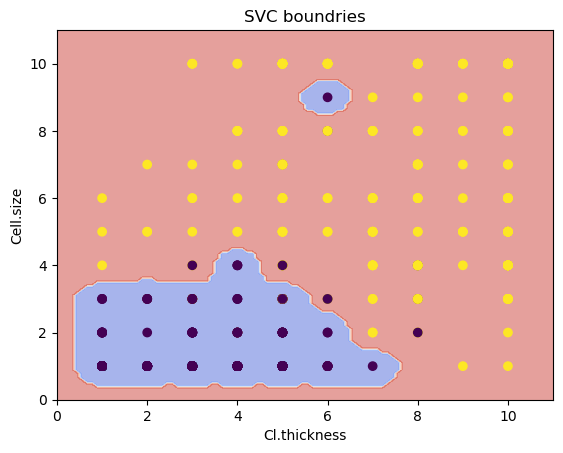

In [78]:
displ=DecisionBoundaryDisplay.from_estimator(svc_model,X_cols,response_method='predict',alpha=0.5,cmap=plt.cm.coolwarm)
displ.ax_.scatter(X_cols["Cl.thickness"],X_cols["Cell.size"],c=Y)

plt.title("SVC boundries")
plt.xlabel("Cl.thickness")
plt.ylabel("Cell.size")

# KNN

In [87]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# finding the best value of k

Text(0.5, 0, 'k value')

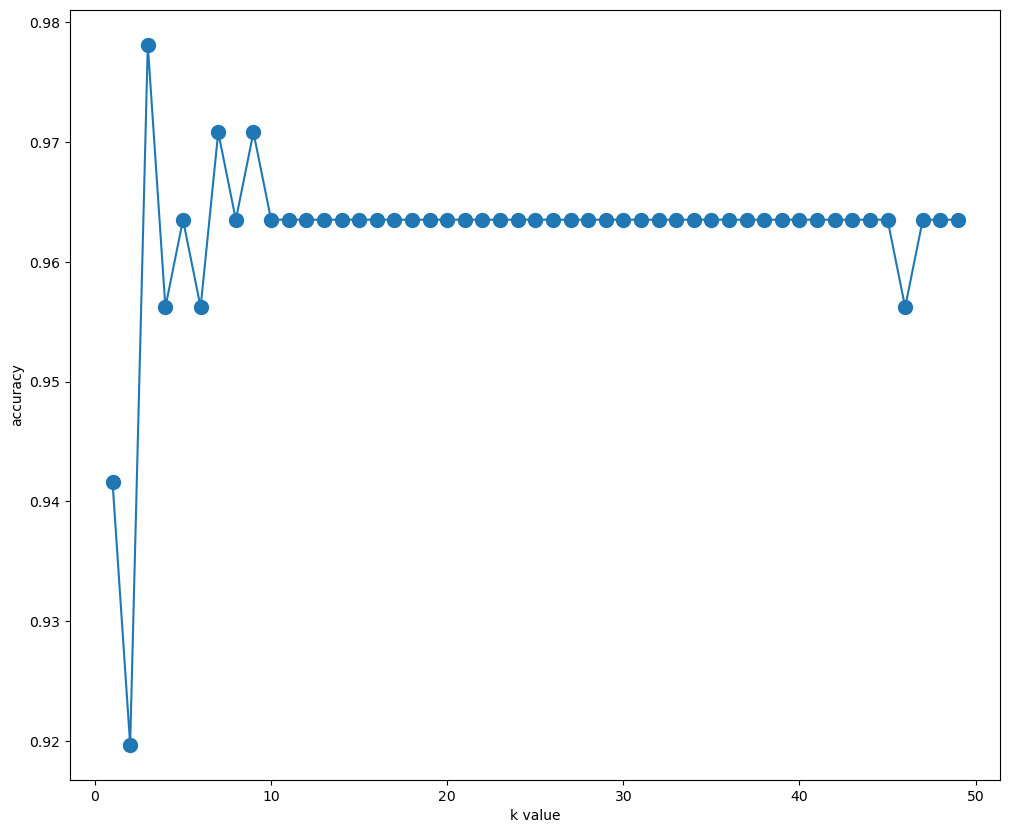

In [90]:
best_accuracy=[]
for k in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    Y_pred=knn.predict(X_test)
    accuracy=accuracy_score(Y_test,Y_pred)
    best_accuracy.append(accuracy)
    
plt.figure(figsize=(12,10))
plt.plot(range(1,50),best_accuracy,marker="o",markersize=10)
plt.ylabel("accuracy")
plt.xlabel("k value")


In [ ]:
# best k value can be 7 or 9

In [101]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)
accuracy=accuracy_score(Y_test,Y_pred)

In [102]:
accuracy

0.9708029197080292

In [103]:
confusion_matrix(Y_test,Y_pred)

array([[87,  2],
       [ 2, 46]], dtype=int64)

In [104]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        89
           1       0.96      0.96      0.96        48

    accuracy                           0.97       137
   macro avg       0.97      0.97      0.97       137
weighted avg       0.97      0.97      0.97       137



In [106]:
Y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1], dtype=int64)

In [105]:
probability=knn.predict_proba(X_test)
probability

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.11111111, 0.88888889],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.22222222, 0.77777778],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.

In [98]:
knn100=KNeighborsClassifier(n_neighbors=3)

In [99]:
knn100.fit(X_cols,Y)

KNeighborsClassifier(n_neighbors=3)

Text(0, 0.5, 'Cell.size')

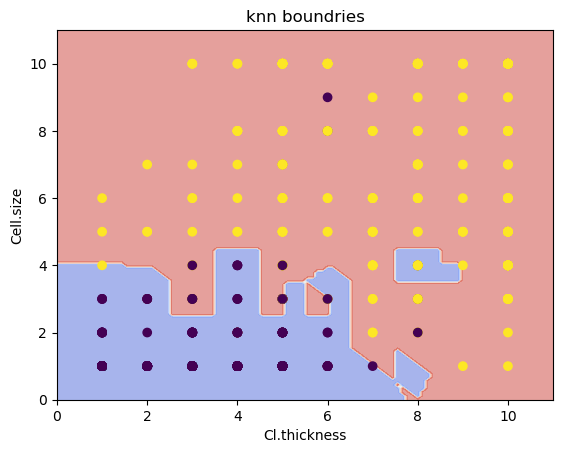

In [100]:
displ=DecisionBoundaryDisplay.from_estimator(knn100,X_cols,response_method='predict',alpha=0.5,cmap=plt.cm.coolwarm)
displ.ax_.scatter(X_cols["Cl.thickness"],X_cols["Cell.size"],c=Y)

plt.title("knn boundries")
plt.xlabel("Cl.thickness")
plt.ylabel("Cell.size")

In [110]:
from sklearn.metrics import roc_curve,roc_auc_score

In [111]:
pos_probability=knn.predict_proba(X_test)[:,1]
AUC_score=roc_auc_score(Y_test,pos_probability)
AUC_score

0.9882958801498127

In [112]:
fpr,tpr,threshold=roc_curve(Y_test,pos_probability)

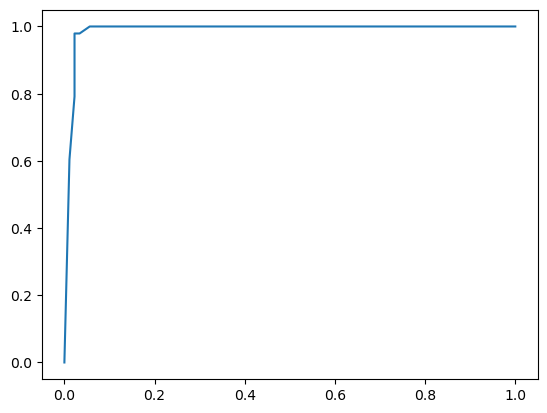

In [113]:
plt.plot(fpr,tpr)